# Bounding Box generator 

In [276]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from torch.utils.data import Dataset,DataLoader
from albumentations.pytorch.transforms import ToTensorV2
from albumentations import Compose, Normalize, Resize, BboxParams
import torch

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(512, 512)


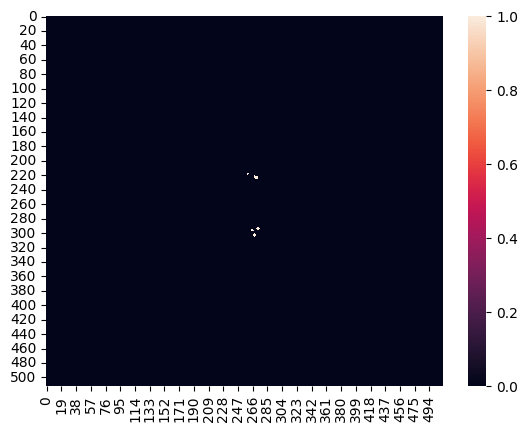

In [277]:
nifti_img = nib.load('../VALDO_Dataset/Task2/sub-101/sub-101_space-T2S_CMB.nii.gz')

data = nifti_img.get_fdata()

slice_0 = data[:, :,16]

sns.heatmap(slice_0)
print(slice_0)
print(slice_0.shape)

### Generate bounding box

In [278]:
# nifti_img = nib.load('../VALDO_Dataset/Task2/sub-101/sub-101_space-T2S_CMB.nii.gz')

# data = nifti_img.get_fdata()

# slice_0 = data[:, :,16]

# sns.heatmap(slice_0)
# # print(slice_0)
# # print(slice_0.shape)


# # Define bounding box coordinates
# x_min = 100
# x_max = 200
# y_min = 300
# y_max = 400

# # print(slice_0.min(), slice_0.max())
# print(slice_0[215].min(), slice_0[225].max())
# print(slice_0[225])

# y_min = slice_0.shape[0] - y_min
# y_max = slice_0.shape[0] - y_max

# plt.gca().add_patch(plt.Rectangle((x_min, y_min), x_max - x_min, y_max - y_min, 
#                                    linewidth=2, edgecolor='r', facecolor='none'))
# plt.show()



In [279]:
# def extract_bounding_boxes(self, mask):
#     # Extract bounding boxes from mask
#     boxes = []
#     contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
#     for cnt in contours:
#         x, y, w, h = cv2.boundingRect(cnt)
#         boxes.append([x, y, x + w, y + h])
#     return boxes

In [280]:
import os

testing_label_relative = 'Documents/VALDO_Dataset/Task2'
current_directory = os.getcwd()

two_directories_up = os.path.abspath(os.path.join(current_directory, "../../"))

# Combine the current directory with the relative path
testing_label_absolute = os.path.join(two_directories_up, testing_label_relative)

# print(os.listdir(testing_label_absolute))
print(testing_label_absolute)
folders = [item for item in os.listdir(testing_label_absolute) if os.path.isdir(os.path.join(testing_label_absolute, item))]

cases = {"cohort1": [], "cohort2": [], "cohort3": []}
# Print the list of folders
for folder in folders:
    if "sub-1" in folder:
        cases["cohort1"].append(folder)
    elif "sub-2" in folder:
        cases["cohort2"].append(folder)
    else:
        cases["cohort3"].append(folder)

cases

c:\Users\nigel\Documents/VALDO_Dataset/Task2


{'cohort1': ['sub-101',
  'sub-102',
  'sub-103',
  'sub-104',
  'sub-105',
  'sub-106',
  'sub-107',
  'sub-108',
  'sub-109',
  'sub-110',
  'sub-111'],
 'cohort2': ['sub-201',
  'sub-202',
  'sub-203',
  'sub-204',
  'sub-205',
  'sub-206',
  'sub-207',
  'sub-208',
  'sub-209',
  'sub-210',
  'sub-211',
  'sub-212',
  'sub-213',
  'sub-214',
  'sub-215',
  'sub-216',
  'sub-217',
  'sub-218',
  'sub-219',
  'sub-220',
  'sub-221',
  'sub-222',
  'sub-223',
  'sub-224',
  'sub-225',
  'sub-226',
  'sub-227',
  'sub-228',
  'sub-229',
  'sub-230',
  'sub-231',
  'sub-232',
  'sub-233',
  'sub-234'],
 'cohort3': ['sub-301',
  'sub-302',
  'sub-303',
  'sub-304',
  'sub-305',
  'sub-306',
  'sub-307',
  'sub-308',
  'sub-309',
  'sub-310',
  'sub-311',
  'sub-312',
  'sub-313',
  'sub-314',
  'sub-315',
  'sub-316',
  'sub-317',
  'sub-318',
  'sub-319',
  'sub-320',
  'sub-321',
  'sub-322',
  'sub-323',
  'sub-324',
  'sub-325',
  'sub-326',
  'sub-327']}

In [281]:
cohort1_labels = []
cohort1_ids = []
for case in cases["cohort1"]:
    label = f"{testing_label_absolute}\\{case}\\{case}_space-T2S_CMB.nii.gz"
    id = f"{testing_label_absolute}\\{case}\\{case}_space-T2S_desc-masked_T2S.nii.gz"
    cohort1_labels.append(label)
    cohort1_ids.append(id)
# print("Label:", cohort1_labels, cohort1_labels.__len__())
# print("Ids:", cohort1_ids, cohort1_ids.__len__())

cohort2_labels = []
cohort2_ids = []
for case in cases["cohort2"]:
    label = f"{testing_label_absolute}\\{case}\\{case}_space-T2S_CMB.nii.gz"
    id = f"{testing_label_absolute}\\{case}\\{case}_space-T2S_desc-masked_T2S.nii.gz"
    cohort2_labels.append(label)
    cohort2_ids.append(id)
# print("Label:", cohort2_labels, cohort2_labels.__len__())
# print("Ids:", cohort2_ids, cohort2_ids.__len__())

cohort3_labels = []
cohort3_ids = []
for case in cases["cohort3"]:
    label = f"{testing_label_absolute}\\{case}\\{case}_space-T2S_CMB.nii.gz"
    id = f"{testing_label_absolute}\\{case}\\{case}_space-T2S_desc-masked_T2S.nii.gz"
    cohort3_labels.append(label)
    cohort3_ids.append(id)
# print("Label:", cohort3_labels, cohort3_labels.__len__())
# print("Ids:", cohort3_ids, cohort3_ids.__len__())

all_labels = cohort1_labels + cohort2_labels + cohort3_labels
all_ids = cohort1_ids + cohort2_ids + cohort3_ids

print(all_labels[0])
print(all_ids[0])

c:\Users\nigel\Documents/VALDO_Dataset/Task2\sub-101\sub-101_space-T2S_CMB.nii.gz
c:\Users\nigel\Documents/VALDO_Dataset/Task2\sub-101\sub-101_space-T2S_desc-masked_T2S.nii.gz


In [282]:
class VALDODataset(Dataset):
    def __init__(self, img_paths, ann_paths, transform=None):
        self.img_paths = img_paths
        self.ann_paths = ann_paths
        self.transform = transform

        assert len(self.img_paths) == len(self.ann_paths), "Mismatch between number of images and annotations"

    def __len__(self):
        return len(self.img_paths)

    def __getitem__(self, idx):
        img_path = self.img_paths[idx]
        ann_path = self.ann_paths[idx]

        # Load 3D image
        img = nib.load(img_path).get_fdata()
        img = (img / np.max(img) * 255).astype(np.uint8)
        
        # Load 3D annotation
        ann = nib.load(ann_path).get_fdata()
        ann = (ann > 0).astype(np.uint8)  # Ensure mask is binary

        slices = []
        targets = []

        for i in range(img.shape[2]):
            img_slice = img[:, :, i]
            ann_slice = ann[:, :, i]

            img_slice = cv2.merge([img_slice] * 3)  # Convert single-channel to three-channel
            boxes = self.extract_bounding_boxes(ann_slice)

            if boxes:
                augmented = self.transform(image=img_slice, bboxes=boxes, labels=[1]*len(boxes))
                img_slice = augmented['image']
                boxes = augmented['bboxes']
                labels = augmented['labels']
            else:
                augmented = self.transform(image=img_slice, bboxes=[], labels=[])
                img_slice = augmented['image']
                boxes = augmented['bboxes']
                labels = augmented['labels']

            target = {
                'boxes': torch.tensor(boxes, dtype=torch.float32),
                'labels': torch.tensor(labels, dtype=torch.int64)
            }

            slices.append(img_slice)
            targets.append(target)

        return slices, targets

    def extract_bounding_boxes(self, mask):
        # Extract bounding boxes from mask
        boxes = []
        contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        for cnt in contours:
            x, y, w, h = cv2.boundingRect(cnt)
            # boxes.append([x, y, x + w, y + h])
            boxes.append([x, y, x + 20, y + 20])
        return boxes


In [283]:
transform = Compose([
    Resize(512, 512),
    Normalize(mean=(0.0, 0.0, 0.0), std=(1.0, 1.0, 1.0)),
    ToTensorV2()
], bbox_params=BboxParams(format='pascal_voc', label_fields=['labels']))

dataset = VALDODataset(img_paths=all_ids, ann_paths=all_labels, transform=transform)
# dataset = VALDODataset(img_paths=all_ids, ann_paths=all_labels)
dataloader = DataLoader(dataset, batch_size=4, shuffle=True, collate_fn=lambda x: tuple(zip(*x)))
print(dataset.__len__())

72


In [284]:
slices, targets = dataset[0]
print(f"Number of slices: {len(slices)}")
print(f"Shape of a slice: {slices[0].shape}, target: {targets[0]}")

num = 0
for i in targets:
    print(num, i)
    num += 1


Number of slices: 35
Shape of a slice: torch.Size([3, 512, 512]), target: {'boxes': tensor([]), 'labels': tensor([], dtype=torch.int64)}
0 {'boxes': tensor([]), 'labels': tensor([], dtype=torch.int64)}
1 {'boxes': tensor([]), 'labels': tensor([], dtype=torch.int64)}
2 {'boxes': tensor([]), 'labels': tensor([], dtype=torch.int64)}
3 {'boxes': tensor([]), 'labels': tensor([], dtype=torch.int64)}
4 {'boxes': tensor([]), 'labels': tensor([], dtype=torch.int64)}
5 {'boxes': tensor([]), 'labels': tensor([], dtype=torch.int64)}
6 {'boxes': tensor([]), 'labels': tensor([], dtype=torch.int64)}
7 {'boxes': tensor([]), 'labels': tensor([], dtype=torch.int64)}
8 {'boxes': tensor([[164., 327., 184., 347.],
        [180., 299., 200., 319.]]), 'labels': tensor([1, 1])}
9 {'boxes': tensor([[257., 320., 277., 340.]]), 'labels': tensor([1])}
10 {'boxes': tensor([]), 'labels': tensor([], dtype=torch.int64)}
11 {'boxes': tensor([[278., 345., 298., 365.]]), 'labels': tensor([1])}
12 {'boxes': tensor([[233.

In [285]:
targets[16]['boxes']

print(targets.__len__())
print(slices.__len__())

35
35


torch.Size([3, 512, 512])


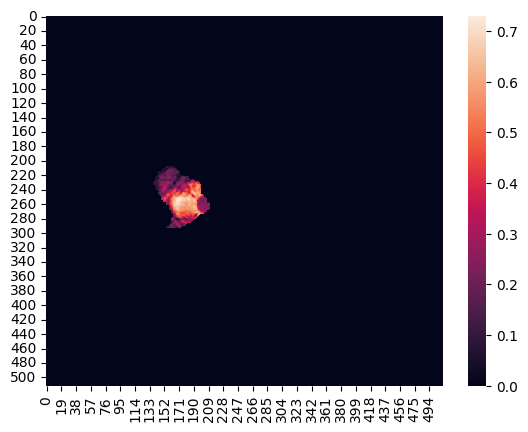

In [286]:
slice_0 = targets[0]['boxes']
slice_base = slices[0]
# print(slice_0)

# print(slice_base.max(), slice_base.min())
print(slice_base.shape)

# Generate heatmap
heatmap_data = torch.mean(slice_base, dim=0)

# Convert the tensor to a NumPy array
heatmap_data_np = heatmap_data.numpy()

# Generate heatmap
sns.heatmap(heatmap_data_np)

# Generate bounding box
for i in range(slice_0.shape[0]):
    x_min = slice_0[i][0]
    x_max = slice_0[i][2]
    y_min = slice_0[i][1]
    y_max = slice_0[i][3]
    plt.gca().add_patch(plt.Rectangle((x_min, y_min), x_max - x_min, y_max - y_min, 
                                    linewidth=2, edgecolor='g', facecolor='none'))
plt.show()

In [291]:
fig, axes = plt.subplots(10, 5, figsize=(300, 400))
fig.get_tight_layout()
for ax, i in zip(axes.flat, range(targets.__len__())):
    targets[i]['boxes']
    slice_base = slices[i]
    # print(slice_0)

    # print(slice_base.max(), slice_base.min())
    print(slice_base.shape)

    # Generate heatmap
    heatmap_data = torch.mean(slice_base, dim=0)

    # Convert the tensor to a NumPy array
    heatmap_data_np = heatmap_data.numpy()

    # Generate heatmap
    sns.heatmap(heatmap_data_np, ax=ax)

    # Generate bounding box
    for i in range(slice_0.shape[0]):
        x_min = slice_0[i][0]
        x_max = slice_0[i][2]
        y_min = slice_0[i][1]
        y_max = slice_0[i][3]
        plt.gca().add_patch(plt.Rectangle((x_min, y_min), x_max - x_min, y_max - y_min, 
                                        linewidth=2, edgecolor='g', facecolor='none'))

TypeError: 'numpy.flatiter' object cannot be interpreted as an integer